# Decision Tree to Diagnose Heart Disease

The objective is to create an intelligent agent, which can suggest a diagnose of heart diseases.<br>
The task is to train a model of human heart, based on measurements, taken from numerous heart disease patients.<br>
For the training we will use data from a public source: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Step 1: Load the Libraries 

In [ ]:
# Install the graphviz package for DT visualisation
!pip install graphviz

In [ ]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# for numeric calculations
import numpy as np

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# from utilities import visualize_classifier
import graphviz

## Step 2: Load a Dataset

First, we load the data from file __processed.cleveland.data__ by use of pandas<br>
It is a table data in __csv__ format.<br>
Columns contain various parameters of human heart. <br>

In [ ]:
# Create URL object
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"

As the data has no header, we need to specify the names of each column before loading it. We get the information of interpretation from the file __heart-disease.names__

In [ ]:
# Create a header
names = ['age','sex','cp','bps','chol','fbs','ecg','hrate','ang','peak','slp','ca','thal','diag']

In [ ]:
# Load the data, create a dataset object
dataset = pandas.read_csv(url, names=names, na_values=["?"])

In [ ]:
dataset.sample()

In [ ]:
dataset.shape

## Step 3: Get to Know The Data

### General Overview
Investigate the dataset. <br>
Find out how many records are available, are they all clean, how many classes they represent. <br>
Create diagrams to visualize the set and its descriptive statistics.

In [ ]:
# See the shape (number of rows) and size (number of columns)
print(dataset.shape)

In [ ]:
list(dataset)

In [ ]:
# See how it looks (get the first 5 records)
dataset.sample(10)

In [ ]:
dataset.info()

In [ ]:
# Have the descriptive statistics calculated for the whole dataset
print(dataset.describe())

In [ ]:
dataset.info()

In [ ]:
# to check null values in data
dataset.isnull().sum()

In [ ]:
# to check null values in data
np.isnan(dataset).sum()

In [ ]:
# detect non-missing values
df = dataset[dataset.notnull()]

In [ ]:
df.shape

### Clean The Dataset

In [ ]:
dataset = dataset.dropna()

In [ ]:
# Group by class attribute diag
# See how many classes are included and how many records per class are distributed
print(dataset.groupby('diag').size())

### Visualization of Dataset Statistics
    1. Draw Histograms
    2. Draw Scatter Plots
    3. Draw Box-Whisker Plots

In [ ]:
# Draw histograms for each feature
dataset.hist()
plt.show()

In [ ]:
# Generate scatter plot 
plt.scatter(dataset['age'], dataset['chol'],  marker="o", picker=True)
plt.title(f'Desease by Age')
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.show()

In [ ]:
# Draw box-whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

These diagrams show the distribution of the values in the columns. <br>
Some of them seem to have Normal (Gaussian) distribution.<br> 
It is good to know, as we can later choose appropriate algorithms for exploitation.

## Step 4: Training
Time to try to train a model.
1. Split the dataset into two: __training set__ and __test set__
2. Build the classifier by implementing __Decision Tree__ algorithm over the training set
3. Test the classifier over the test set
3. Estimate how accurate it is

### Prepare The Data For Training

In [ ]:
# Convert the dataset into array
array = dataset.values

#### Split Data

Create two (sub) arrays from it
- X - features, all rows, all columns but the last one
- y - labels, target, all rows, the last column

Then split X and y into train and test sub-sets.

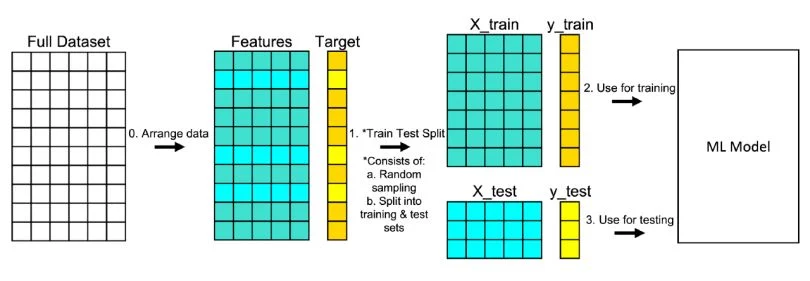

In [ ]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
prop = 0.2
# ensure same split at every run
seed = 123

In [ ]:
def splitdataset(array):
    X = array[:, :-1]
    y = array[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=prop, random_state=seed)
    return X, y, X_train, X_test, y_train, y_test

In [ ]:
X, y, X_train, X_test, y_train, y_test = splitdataset(array)

In [ ]:
# Separate input data into classes based on labels of diagnoses
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

In [ ]:
# Visualise the classes
for i in range(5):
    classx = np.array(X[y==i])       
    # print the shape
    print("Class", i, ": ", classx.shape)  

### Train Model

#### Decision Tree

In [ ]:
# params = {'max_depth': 6}
params = {'max_depth': None}

In [ ]:
# Build Decision Trees Classifier 
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)

In [ ]:
classifier.fit(X_train, y_train)

#### Visualisation

In [ ]:
# draw tree from the trained data by graphviz package
dot_data = tree.export_graphviz(classifier, out_file=None,feature_names=dataset.columns[:13],
                        class_names = True, filled=True, rounded=True, proportion = False,
                        special_characters=True)   

In [ ]:
# result DT saved in file heart.pdf
graph = graphviz.Source(dot_data)
graph.render("heart") 

In [ ]:
# show it here
graph 

## Step 5. Testing

### Testing for Prediction

Now we can try to implement the model on our test set.


In [ ]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)

In [ ]:
# predicted data (calculated by our model)
y_testp

In [ ]:
# true data (observed facts)
y_test

## Step 6: Estimation of Accuracy

The __score( )__ method and __accuracy_score( )__ function are both essential tools in evaluating machine learning models, especially in supervised learning tasks. While they both assess model performance in terms of accuracy, they differ in terms of usage, flexibility, and application.
- score() method evaluates the model on test data
- accuracy_score() function compares predicted values with the true values

#### Method 1: score()
Useful for quick model evaluation

In [ ]:
score = classifier.score(X_test, y_test)
print(f"Score: {score}")

#### Method 2: accuracy_score()
Useful for comparing models

The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.

In [ ]:
# Calculated the accuracy of the model comparing the observed data and predicted data
accuracy = accuracy_score(y_test, y_testp)
print(f"Accuracy: {accuracy}")

### Confusion Matrix

In [ ]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_testp)
confusion_mat

Confusion matrix helps to understand where the correct and wrong predictions are. <br>
It provides an indication of the __three types of predictions__: 
- True Positives (Diagonal): Correct predictions (Actual A=Predicted A)
- False Positives (Column-wise, excluding diagonal): The sum of all instances where this class was predicted, but the actual class was different
- False Negatives (Row-wise, excluding diagonal): The sum of all instances where a class was actual, but the model wrongly predicted something else

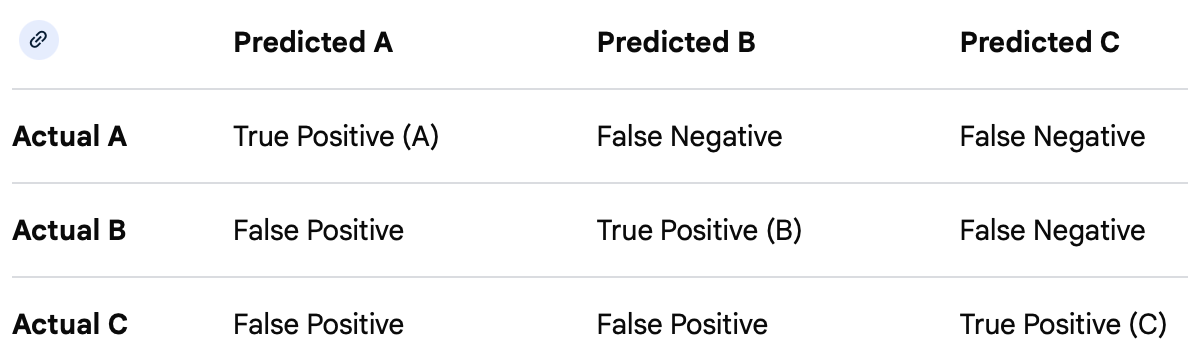

The diagonal elements represent the number of points for which the predicted label is equal to the true label.
The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.<br>
The off-diagonal elements are those that are mislabeled by the classifier. <br>

In [ ]:
# visualize the confusion matrix by use of seaborn library
import seaborn as sns

plt.figure(figsize=(4,3))
 
# Parameters:
# - confusion matrix in array format   
# - annot = True: show the numbers in each heatmap cell
ax = sns.heatmap(confusion_mat, annot=True)
 
# set x-axis label and ticks. 
ax.set_xlabel("Predicted in Class")
 
# set y-axis label and ticks
ax.set_ylabel("Actual in Class")
 
# set plot title
ax.set_title("Confusion Matrix")
 
plt.show()


### Classification Report

There are four coeficients, calculated out of the correct and wrong predictions:
__Precission__, __Recall__, __Accuracy__, and __F1__ - a harmonic mean of Precission and Recall.

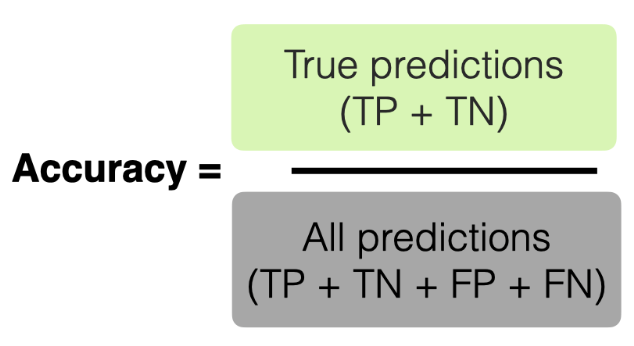

#### Precision and Recall

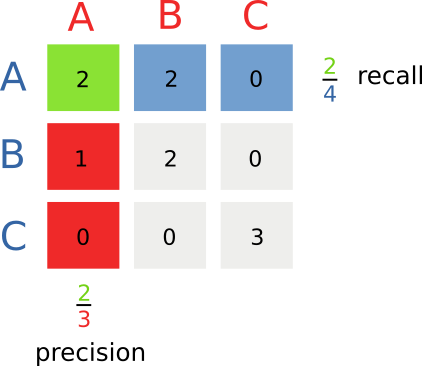

#### F Measure

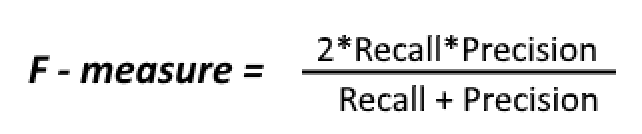

In [ ]:
# give names to the classes
class_names = ['Class0', 'Class1', 'Class2','Class3', 'Class4']

In [ ]:
def report(x_set, y_set, class_names):
    predicted = classifier.predict(x_set)
    class_report = classification_report(y_set, predicted, target_names=class_names)
    score = accuracy_score(y_set, predicted)
    print('accuracy score = ', score)
    return class_report

#### For Training Data Set

In [ ]:
print(report(X_train, y_train, class_names))

#### For Test Data Set

In [ ]:
print(report(X_test, y_test, class_names))

The results, related to the training set and the test set should be similar, otherwise our model is overfitted!

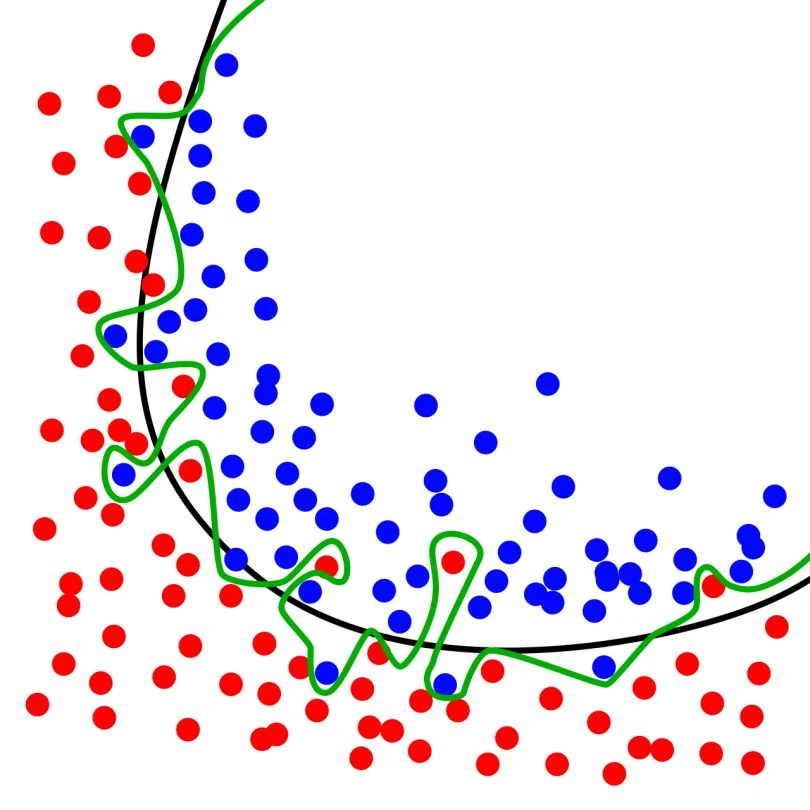

### Try Improvement

In [ ]:
depth_range = range(1, 15)

In [ ]:
# change the depth
def tree_performance(x_set, y_set):
    scores = []
    for d in depth_range:
        params = {'max_depth': d}
        classifier = DecisionTreeClassifier(**params, random_state = seed)
        classifier.fit(x_set, y_set)  
        score = classifier.score(x_set, y_set)
        print('max_depth: ', d, '\tscore: ', score)
        scores.append(score)
    return scores

In [ ]:
scores1 = tree_performance(X_train, y_train)

In [ ]:
scores2 = tree_performance(X_test, y_test)

In [ ]:
def tree_scores(f1, f2):
    fig, ax = plt.subplots(figsize = (6,5), facecolor = 'white');
    ax.plot(depth_range, f1, color='red') 
    ax.plot(depth_range, f2, color='blue') 
    ax.set_xlim([1, max(depth_range)])
    ax.grid(True, axis = 'both', linestyle = ':')
    ax.set_xlabel('max_depth')
    ax.set_ylabel('accuracy')
    ax.set_title('Model Performance')
    ax.legend(['train data', 'test data'])

In [ ]:
tree_scores(scores1, scores2)

In [ ]:
params = {'max_depth': 12}

In [ ]:
classifier = DecisionTreeClassifier(**params, random_state = seed)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

### Cross-Validation

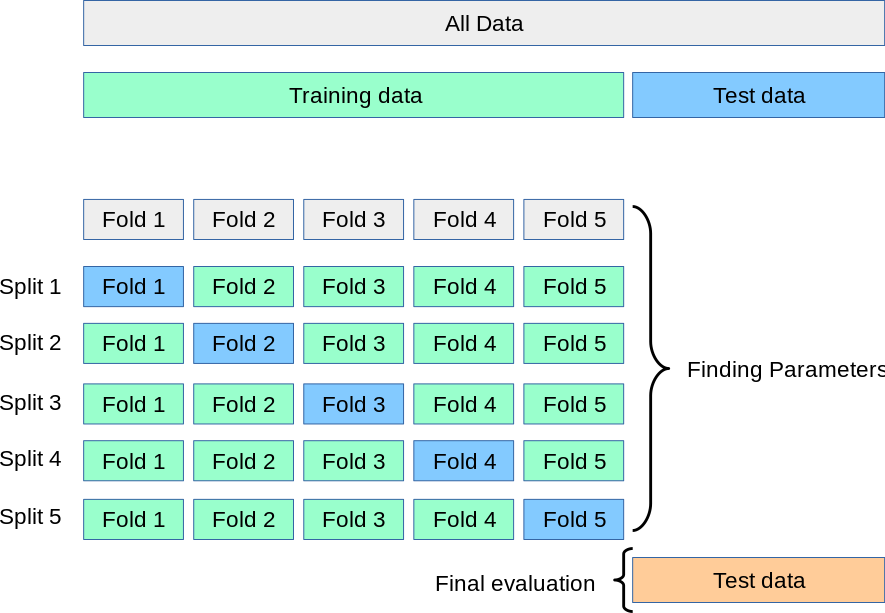

In [ ]:
k_folds = KFold(n_splits = 2)

In [ ]:
scores = cross_val_score(classifier, X, y, cv = k_folds)
scores

In [ ]:
scores.mean()

In [ ]:
new_classifier = cross_validate(classifier, X_train, y_train, cv=k_folds, return_estimator=True)

In [ ]:
new_classifier['test_score']

In [ ]:
predicted = new_classifier['estimator'][1].predict(X_test)
predicted

In [ ]:
accuracy = accuracy_score(y_test, predicted)
accuracy

### Validation with Random Data Samples

In [ ]:
# new person's measures
p = [[59.0,	1.0, 1.0, 134.0, 204.0,	0.0, 0.0, 162.0, 0.0, 0.8, 1.0,	2.0, 3.0]]
 
# should be diagnosed in class 1
my_prediction = classifier.predict(p)
my_prediction

Try to create another model. Save the final version in a file for future use.

### Save the Model

In [ ]:
# joblib is a set of useful tools
import joblib 

In [ ]:
# give a name to the file, ‘.sav’ or ‘.pkl’ extension
filename = 'my_classification_model.pkl'
# save the model with joblib's function dump()
joblib.dump(classifier, filename)

## Step 7: Implementation

### Use the Model (in another program)

In [ ]:
# load model with joblib's function load() in any other application
filename = 'my_classification_model.pkl'
loaded_model = joblib.load(filename)

In [ ]:
# start using it in this application, no more training is needed
p = [[59.0,	1.0, 1.0, 134.0, 204.0,	0.0, 0.0, 162.0, 0.0, 0.8, 1.0,	2.0, 3.0]]
diag = loaded_model.predict(p)

In [ ]:
# check results
print(classification_report([1], diag)) 

## <span style="color:red">Task</span>
Try to improve the model by applying Random Forest classifier provided in sklearn.<br>
Repeat the training, testing and validation.<br>
Compare the Decision Tree and Random Forest methods.
Answer to the question: Which method gives better results?